# Model Using 1/3 Window - Normalized
## Both UX and UY

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
model = keras.models.load_model(r"C:\Users\bono2\Desktop\Pitching Airfoil\models_window_normalized\model_1.h5")

In [3]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## TEST DATA

In [4]:
test_X = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\test_X.npy")
test_Y = (np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\test_Y.npy")[:,1]).reshape(-1,1)

OHE = OneHotEncoder(sparse = False)
test_Y = OHE.fit_transform(test_Y)

OHE.categories_

[array([0.05, 0.1 , 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.5 ])]

In [5]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(test_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(test_Y, axis = 1)

53/53 [==============================] - 8s 14ms/step


In [6]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       210
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       210
           5       1.00      1.00      1.00       210
           6       1.00      1.00      1.00       210
           7       1.00      1.00      1.00       210

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [7]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Test Accuracy = ", accuracy)

Test Accuracy =  1.0


Confusion matrix, without normalization


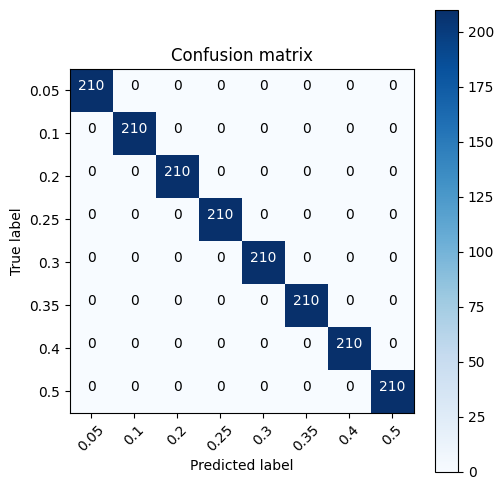

In [8]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

## VALIDATION DATA

In [9]:
val_X = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\val_X.npy")
val_Y = (np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\val_Y.npy"))[:,1].reshape(-1,1)

val_Y = OHE.transform(val_Y)

In [10]:
# Get Predictions (reverse to_categorical)
pred_proba = model.predict(val_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(val_Y, axis = 1)
del val_X
del val_Y

53/53 [==============================] - 1s 15ms/step


In [11]:
print(classification_report(actual, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       210
           3       1.00      1.00      1.00       210
           4       1.00      1.00      1.00       210
           5       1.00      1.00      1.00       210
           6       1.00      1.00      1.00       210
           7       1.00      1.00      1.00       210

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [12]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Validation Accuracy = ", accuracy)

Validation Accuracy =  1.0


Confusion matrix, without normalization


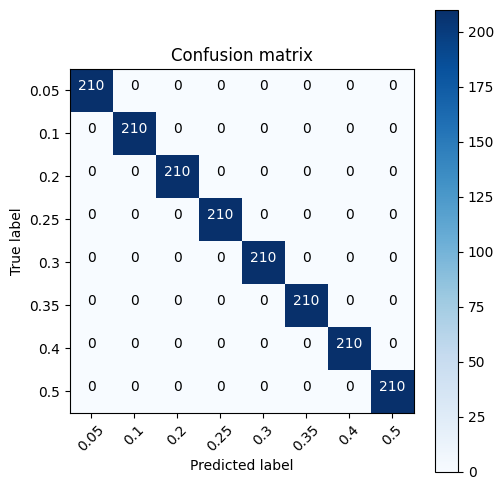

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

## TRAIN DATA

In [14]:
train_X = np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalized\train_X.npy")
train_Y = (np.load(r"C:\Users\bono2\Desktop\Pitching Airfoil\dataset\window_normalizedw\train_Y.npy"))[:,1].reshape(-1,1)

train_Y = OHE.transform(train_Y)

# Get Predictions (reverse to_categorical)
pred_proba = model.predict(train_X)
prediction = np.argmax(pred_proba, axis = 1)
actual = np.argmax(train_Y, axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bono2\\Desktop\\Pitching Airfoil\\dataset\\window_normalizedw\\train_Y.npy'

In [ ]:
print(classification_report(actual, prediction))

In [ ]:
correct = 0
wrong_indices = []
wrong_actual = []
wrong_pred = []

for i in range(actual.shape[0]):
    if actual[i] == prediction[i]:
        correct += 1
    else:
        wrong_indices.append(i)
        wrong_pred.append(prediction[i])
        wrong_actual.append(actual[i])


accuracy = correct/int(actual.shape[0])
print("Train Accuracy = ", accuracy)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(actual, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=list(OHE.categories_)[0],normalize=False,
                      title='Confusion matrix')
plt.show()

In [ ]:
print(Counter(actual))

In [ ]:
del test_X